<a href="https://colab.research.google.com/github/zar55/COSC_635_Reinforcement_Learning/blob/main/Lab_07_zziauddin1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 7

**Zargham Ziauddin**


## Getting Started

Follow the instructions below to set copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Mount your Google Drive by running the cell below and accepting the prompts you are presented with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparing the Colab Environment

Run the cell below to install gymnasium and to download rltools to the virtual machine.

In [ ]:
%%capture
!pip install swig
!pip install gymnasium[box2d]==0.28.1
!pip install "stable-baselines3[extra]==2.0.0"
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git

The cell below includes the import statements that you will need for this assignmnet.

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import rltools.gym as gym
from rltools.utils import RandomAgent, SB3Agent, sb3_evaluation_curves
from rltools.utils import create_gif, evaluate

from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecNormalize

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in Part 1 are distinct from those used in Part 2. An exception to this rule can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

## GPU Acceleration

GPU acceleration will be helpful for some parts of this assignment. Specifically, the code in 2.C will run significantly faster on a GPU than on a CPU. The rest of the notebook, however, can be run on CPU with no issues.

Google Colab provides free GPU access, but this usage is subject to a daily limit. In order to preserve your GPU hours, I would recommend not enabling the GPU until you are ready to run code in 2.C.

The GPU can be enabled by going to `Runtime > Change runtime type`. You should have `T4 GPU` selected.

Keep in mind that changing the runtime type does reset your kernal, so you will need to re-run the cells at the start of the notebok after enabling the GPU.

# Part 1 - Exploring Bipedal Walker Environment

You will be working with the [Bipedal Walker](https://gymnasium.farama.org/environments/box2d/bipedal_walker/) environment throughout this assignment. The goal for Part 1 will simply be to explore the environment.


## 1.A - Create Environment

Use the cell below to create a copy of the environment. Then use Matplotlib to display the starting state of the environment (without axes). Be sure to store the array for the initial state when reseting the environment.

Note: The version of the environment you create here will only be used in Part 1. We will create new enviornments in Part 2 when we train an A2C agent.

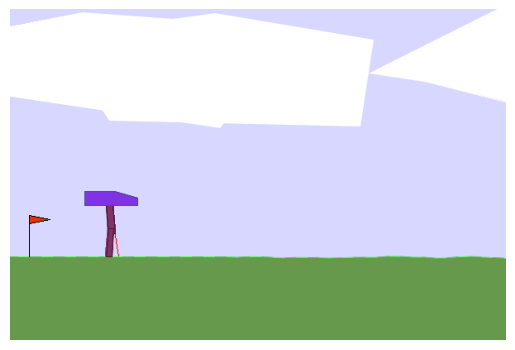

In [ ]:
bipedal_env = gym.make('BipedalWalker-v3', render_mode = 'rgb_array')

state, info = bipedal_env.reset()

plt.imshow(bipedal_env.render())
plt.axis('off')
plt.show()

## 1.B - Action and Observation Space

The action space and observation/state space for the Bipedal Walker environment are both continuous. Actions and observations are both represented using NumPy arrays of floating point values. Our next task will be to determine the size of these arrays.

Print the `shape` attribute of the environment's `observation_space`. Then print the `shape` attribute of the environment's `action_space`.

Note that this is the first environment we have encountered with a continuous action space. We have previously worked with 2 environments with continuous state spaces (Cartpole and Lunar Lander).

In [ ]:
bipedal_observation = bipedal_env.observation_space.shape

bipedal_action = bipedal_env.action_space.shape

print(f"Bipedal Walker Observation Space: {bipedal_observation} \nBipedal Walker Action Space: {bipedal_action}")

Bipedal Walker Observation Space: (24,) 
Bipedal Walker Action Space: (4,)


## 1.C - Viewing a State Array

Print the initial state for the environment. This was created in 1.A.

This should be an array with 24 values. The Bipedal Walker documentation states that the values in this array represent the hull angle speed, angular velocity, horizontal speed, vertical speed, position of joints and joints angular speed, legs contact with ground, and 10 lidar rangefinder measurements.

In [ ]:
state, info = bipedal_env.reset()
print(f'Starting State: {state}')

Starting State: [ 2.7459839e-03  9.6926851e-06 -1.2638620e-03 -1.6000066e-02
  9.2461891e-02  2.9339718e-03  8.5981929e-01 -9.3002361e-04
  1.0000000e+00  3.2786224e-02  2.9338673e-03  8.5354650e-01
 -1.9962604e-03  1.0000000e+00  4.4081339e-01  4.4581950e-01
  4.6142212e-01  4.8954949e-01  5.3410202e-01  6.0246021e-01
  7.0914787e-01  8.8593054e-01  1.0000000e+00  1.0000000e+00]


## 1.D - Viewing an Action Array

Use the `sample()` method of the `action_space` attribute of the environment to select a random action.

This should be an array with 4 values. The Bipedal Walker documentation states that the values in this array are motor speed values in the [-1, 1] range for each of the 4 joints at both hips and knees.

In [ ]:
bipedal_env.action_space.sample()

array([-0.84835416,  0.47736165,  0.40182543, -0.7113148 ], dtype=float32)

## 1.E - Performance of Random Agent

Use the cell below to create an instance of `RandomAgent` for this environment. Then use `evaluate()` to analyze the agent's performance. Use `gamma=1.0`, `episodes=50`, `max_steps=1000`, and `seed=1`.

In [ ]:
bipedal_random = RandomAgent(bipedal_env)

bipedal_eval = evaluate(bipedal_env,
                        bipedal_random,
                        gamma = 1.0,
                        episodes = 50,
                        max_steps = 1000,
                        seed = 1)

Mean Return:    -96.5795
StdDev Return:  24.82
Mean Length:    278.76
StdDev Length:  383.4886


## 1.F - Sample Episodes For Random Agent

Use the cells below to create two gifs demonstrating episodes generated by the random agent. Use `max_steps=1000` in both cases. Set seeds for the sake of reproducibility.

You should select your seeds to demonstrate two different types of behavior. In particular, you should find one episode with a length that is less than 100 steps, and another episode with a length that is greater than 500 steps.

**Note:** To reduce the size of the gifs to help guarantee that they appear in your HTML render, please set `scale=0.8` and `num_colors=8` when calling `create_gif()`.

84 steps completed.
Cumulative reward: -110.525


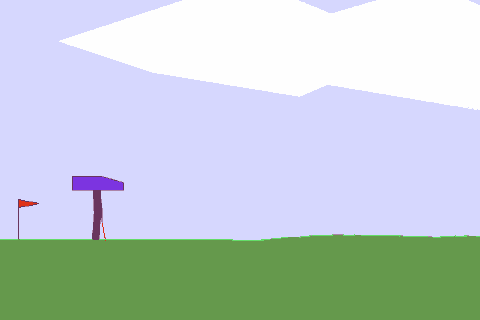

In [ ]:
create_gif(bipedal_env,
           bipedal_random,
           max_steps = 1000,
           seed = 100,
           scale = .8,
           num_colors = 8,
           folder = 'gifs',
           filename = 'bipedal_01'
           )

1000 steps completed.
Cumulative reward: -48.4598


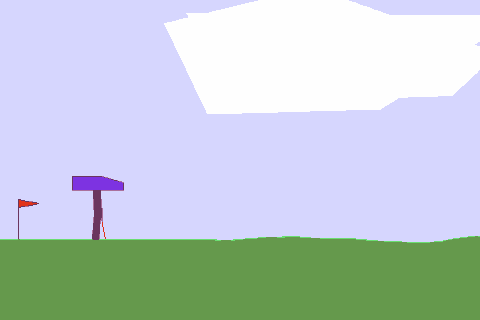

In [ ]:
create_gif(bipedal_env,
           bipedal_random,
           max_steps = 1000,
           seed = 600,
           scale = .8,
           num_colors = 8,
           folder = 'gifs',
           filename = 'bipedal_02'
           )

# Part 2 - Training an A2C Agent

The Bipedal Walker environment has continuous actions. Of the RL models that we have discussed in this course, policy gradient and actor-critic methods are the only ones capable of generating continuous actions. With this in mind, we will train an A2C agent on this environment.


## 2.A - Create Environments

We will now create the environments to be used in Part 2. We will use vectorized environments for training and evalation. We will also perform normalization/scaling on the states, as this will produce better training results. We will also create one non-vectorized environment for testing.

Use the cell below to perform the following tasks:
* Create two vectorized versions of the environment, one for training and one for evaluation. Set `n_env=16` and `seed=0` for both environments.
* Wrap each of the vectorized environments in a `VecNormalize()` class with `norm_obs=True`, `norm_reward=False`, and `clip_obs=10.0`.
* Create a non-vectorized version of the environment for testing.

In [ ]:
bipedal_train_env = make_vec_env(env_id = 'BipedalWalker-v3', n_envs = 16, seed = 0)
bipedal_train_env_normal = VecNormalize(bipedal_train_env, norm_obs = True, norm_reward = False, clip_obs = 10.0)

bipedal_eval_env = make_vec_env(env_id = 'BipedalWalker-v3', n_envs = 16, seed = 0)
bipedal_eval_env_normal = VecNormalize(bipedal_eval_env, norm_obs = True, norm_reward = False, clip_obs = 10.0)

bipedal_test_env = gym.make('BipedalWalker-v3', render_mode = 'rgb_array')

## 2.B - Create Evaluation Callback

In the cell below, create an `EvalCallback` object using the normalized evaluation environment. Set the callback to run the evalation every 1000 time steps, using 20 episodes for each evaluation. Set `warn=False`.

In [ ]:
if os.path.exists('bipedal_evaluation/') : shutil.rmtree('bipedal_evaluation/')

bipedal_eval_callback = EvalCallback(bipedal_eval_env_normal,
                                     best_model_save_path = 'bipedal_evaluation/',
                                     log_path = 'bipedal_evaluation/',
                                     eval_freq = 1000,
                                     n_eval_episodes = 20,
                                     warn = False
                                    )

## 2.C - Build and Train Model

The cell below provides code for creating a linear scheduler for the learning rate, as well as code for building and training an A2C model. Complete the code by providing your normalized training environment and your evaluation callback.

**Extra Credit Opportunity:** You are being supplied with parameters that will produce acceptable performance for this environment. However, you are encouraged to experiment with the parameters to see if you can get better performance. If you are able to meet certain performance objectives, you can earn extra credit on this assignment. This will be discussed further after Part 2.E below.



In [ ]:
%%time

def linear_schedule(initial_lr, final_lr):
    def sched_func(progress_remaining):
        return final_lr + progress_remaining * (initial_lr - final_lr)
    return sched_func

model = A2C(
    policy = 'MlpPolicy',
    env = bipedal_train_env_normal,

    learning_rate = linear_schedule(9.6e-4, 8.6e-4),
    n_steps = 8,
    gae_lambda = 0.9,
    vf_coef = 0.4,
    normalize_advantage = False,
    use_sde = True,
    policy_kwargs = dict(log_std_init=-2, ortho_init=False),

    verbose=0,
    seed=1,
)

model = model.learn(total_timesteps=1_000_000, progress_bar=False, callback=bipedal_eval_callback)

Eval num_timesteps=16000, episode_reward=-99.70 +/- 0.47
Episode length: 92.15 +/- 3.81
New best mean reward!
Eval num_timesteps=32000, episode_reward=-112.48 +/- 17.78
Episode length: 183.75 +/- 40.18
Eval num_timesteps=48000, episode_reward=-93.44 +/- 1.64
Episode length: 125.10 +/- 9.62
New best mean reward!
Eval num_timesteps=64000, episode_reward=-95.29 +/- 2.73
Episode length: 120.05 +/- 17.14
Eval num_timesteps=80000, episode_reward=-101.24 +/- 0.99
Episode length: 123.80 +/- 18.27
Eval num_timesteps=96000, episode_reward=-132.70 +/- 1.71
Episode length: 199.75 +/- 7.36
Eval num_timesteps=112000, episode_reward=-130.35 +/- 29.25
Episode length: 486.05 +/- 403.64
Eval num_timesteps=128000, episode_reward=-85.59 +/- 21.59
Episode length: 1380.25 +/- 523.11
New best mean reward!
Eval num_timesteps=144000, episode_reward=-53.95 +/- 9.24
Episode length: 1600.00 +/- 0.00
New best mean reward!
Eval num_timesteps=160000, episode_reward=-106.29 +/- 4.15
Episode length: 83.50 +/- 7.18
Eva

## 2.D - Plot the Evaluation Results

Use the `sb3_evaluation_curves()` function to generate plots illustrating the progression of the scores for the evaluation environment during training. Specify a value for `path`, but leave the default values for the other parameters.

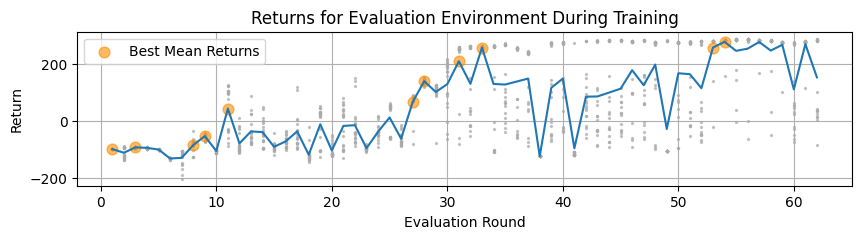

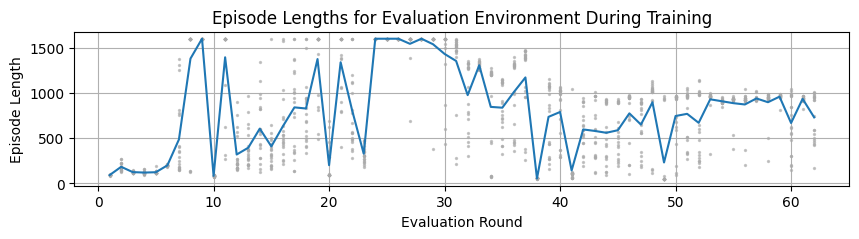

In [ ]:
sb3_evaluation_curves(path = 'bipedal_evaluation/')

## 2.E - Load and Evaluate the Best Model

Use the cell below to load the best model encountered during training. Set `env` equal to your test environment when calling `A2C.load()`. Create an instance of `SB3Agent` using the loaded model. Then use the `evaluate()` function to score the agent on the test environment, setting `gamma=1.0`, `episodes=50`, `max_steps=1000`, and `seed=1`.


In [ ]:
bipedal_best = A2C.load(path = 'bipedal_evaluation/best_model.zip', env = bipedal_test_env)

bipedal_sb3 = SB3Agent(model = bipedal_best, normalizer = bipedal_train_env_normal.normalize_obs)

bipedal_eval = evaluate(env = bipedal_test_env,
                        agent = bipedal_sb3,
                        gamma = 1.0,
                        episodes = 50,
                        max_steps = 1000,
                        seed = 1
                       )

Mean Return:    282.9528
StdDev Return:  3.3562
Mean Length:    928.16
StdDev Length:  20.7435


### Extra Credit Opportunity

If you trained the model using the parameters provided in 2.C and used a T4 GPU for training, the cell above should result in a mean return of approximately 281 with a standard deviation of approximately 54. If you would like, you can adjust the parameters in 2.C to see if you can train a model with better performance. If you can train a model for which `Mean[Return] - StdDev[Return] > 230`, you will earn some extra credit on this assignment. The amount of extra credit will depend on by how much your model exceeds the goal of 230. For context, it is possible to get a score of over 290 in a reasonable amount of time.

If you wish to try to obtain a better score, I recommend focusing on the values for the learning rate and the number of timesteps. It is possible to get very good performance in 1.6 million time steps or fewer, but you can use as many as you would like.

Keep in mind that if you change the parameters in 2C, you should re-run the cells in 2A and 2B (or restart your kernel).

**If you do find parameters that produce better performance, do not share these with other students! Two students submitting the exact same parameter values will be subject to scrutiny.**


## 2.F - Sample Episode For A2C Agent

Use the cell below to create gif demonstrating an episode generated by the A2C agent. Use `max_steps=1000`. Set a seed for the sake of reproducibility.

There is likely to be some variance in the performance of your agent. Most seeds should result in good performance, but the agent might perform poorly when using certain seed values. If your agent does not have a cumulative reward of at least 250 in the episode generated, then please adjust the seed value until this goal is met.

**Note:** To reduce the size of the gif to help guarantee that it appears in your HTML render, please set `scale=0.8` and `num_colors=8` when calling `create_gif()`.

923 steps completed.
Cumulative reward: 283.1125


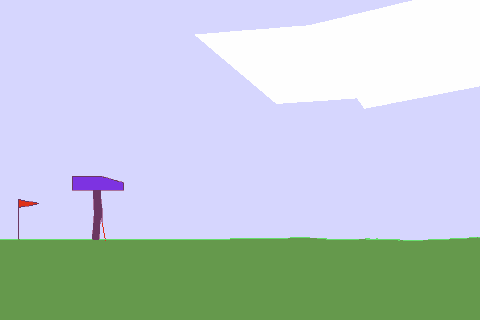

In [ ]:
create_gif(env = bipedal_test_env,
           agent = bipedal_sb3,
           max_steps = 1000,
           seed = 42,
           scale = .8,
           num_colors = 8,
           folder = 'gifs',
           filename = 'bipedal_final')

# Important Note about Submissions

**After re-running your notebook for submission, you should check 2.F to confirm that the selected seed value is still satisfactory.** If it is not, then you can change the seed and re-run this cell as needed. When you have found a satisfactory seed, you can re-run the last cell of the notebook to create a new HTML render for your notebook.

# Submission Instructions

1. The cell below will generate an HTML render of your notebook within the same Google Drive folder in which you stored this notebook. Adjust the path for your notebook in the cell below as needed.
2. Restart your notebook and run it from start to finish.
3. If the notebook executes without error, download the HTML export of the notebook and then upload it to Canvas. Make sure to carefully review the contents of the HTML export to ensure that everything is displayed correctly.
4. Click on "Share" in the upper-right corner of this notebook. Then select "Anyone with the link" from dropdown. Click "Copy Link" and paste the copied link as a comment in your submission on Canvas.


In [ ]:
%%capture
import time
time.sleep(30)
!jupyter nbconvert --to html /content/drive/MyDrive/COSC_635/Lab_07_zziauddin1.ipynb